float32
tf.Tensor([   1 1024  768    3], shape=(4,), dtype=int32)
Step0completed
tf.Tensor([   1 1024  768    3], shape=(4,), dtype=int32)
Step1completed
tf.Tensor([   1 1024  768    3], shape=(4,), dtype=int32)
Step2completed
tf.Tensor([   1 1024  768    3], shape=(4,), dtype=int32)
Step3completed
tf.Tensor([   1 1024  768    3], shape=(4,), dtype=int32)
Step4completed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


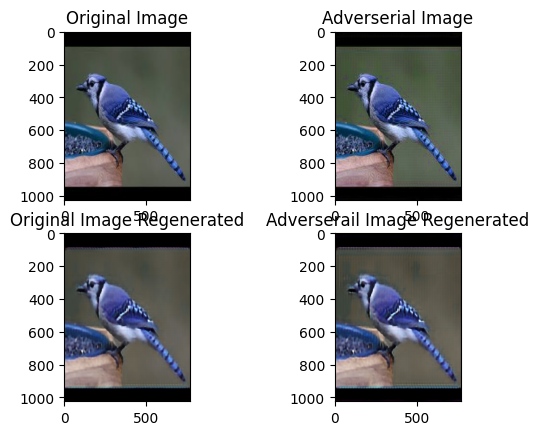

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def pgd_attack(model, x, epsilon, alpha, num_steps):
    # Generate adversarial example using PGD
    x_adv = tf.cast(x, dtype=tf.float32)
    for _ in range(num_steps):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            print (tf.shape(x_adv))
            output = model(x_adv, training=False)
            loss = tf.losses.mean_squared_error(x_adv, output)

        grad = tape.gradient(loss, x_adv)
        if grad is None:
            raise ValueError("Gradient is None. Check model architecture and loss function.")
        grad_sign = tf.sign(grad)
        x_adv = x_adv + alpha * grad_sign
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0.0, 1.0)
        print ("Step"+ str(_) + "completed")

    return x_adv

model = tf.keras.models.load_model('C:\d_drive\Binod Sir Project\model_epoch=5_loss=mae-20230528T152307Z-001')

# Load the test image you want to perturb
image_path = 'C:\d_drive\Binod Sir Project\images (1).jpeg'
image = load_img(image_path, target_size=(1024, 768))  # Resize the image to match the input size of your model
test_image = np.array(image, dtype=np.float32) / 255.0  # Convert the image to a numpy array and normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)

print (test_image.dtype)
clone = tf.identity(test_image).numpy()

# Set the epsilon value for the attack
epsilon = 0.05  # Maximum perturbation
alpha = 0.005  # Step size
num_steps = 5  # Number of PGD steps

# Generate the adversarial example
x_adv = pgd_attack(model, clone, epsilon, alpha, num_steps)

# Convert the perturbed image to a NumPy array
x_adv_np = x_adv.numpy()

# Display the original and perturbed images
plt.subplot(2, 2, 1)
plt.imshow(test_image[0])
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(x_adv_np[0])
plt.title('Adverserial Image')

plt.subplot(2, 2, 3)
plt.imshow(model(test_image).numpy()[0])
plt.title('Original Image Regenerated')

plt.subplot(2, 2, 4)
plt.imshow(model(x_adv_np).numpy()[0])
plt.title('Adverserail Image Regenerated')
plt.show()